In [1]:
import pandas as pd
df = pd.read_excel("D:\MyFiles\Downloads\DS1_C4_S9_Car_Data.xlsx")

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

DATA PREPROCESSING 

IDENTIFYING NULL VALUES

SEPERATING NUMERICAL AND NON NUMERICAL COLUMNS 

REPLACING MISSING VALUES OF NUMERICAL COLUMNS WITH MEDIAN() AND (NOT AVAILABLE) FOR CATEGORICAL COLUMNS 

IN TASK 3 ANALYSIS - FINDING THE OUTLIERS WITH IQR METHOD AND BOXPLOT AND TREATING THEM WITH CAPPING METHOD



In [2]:
null = df.isnull().sum()
null

S. No.                               0
Make                                75
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            6
Doors                                4
City_Mileage_km_litre              555
Highway_Mileage_km_litre           800
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                       1081
High_Speed_Alert_System           1068
ABS_(Anti-lock_Braking_Sy

In [3]:
# Data Cleaning
num_df = df.select_dtypes(include=['number'])
cat_df = df.select_dtypes(exclude=['number'])

num_df.fillna(num_df.median(), inplace=True)
cat_df.fillna("Not Available", inplace=True)

df_cleaned = pd.concat([num_df, cat_df], axis=1)

df_cleaned = df_cleaned.drop_duplicates()

In [4]:
num_df.isnull().sum()

S. No.                      0
Displacement                0
Cylinders                   0
Valves_Per_Cylinder         0
Fuel_Tank_Capacity_litre    0
Height_mm                   0
Length_mm                   0
Width_mm                    0
Doors                       0
City_Mileage_km_litre       0
Highway_Mileage_km_litre    0
Power                       0
Torque                      0
Seating_Capacity            0
dtype: int64

In [5]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   S. No.                          1276 non-null   int64  
 1   Displacement                    1276 non-null   float64
 2   Cylinders                       1276 non-null   float64
 3   Valves_Per_Cylinder             1276 non-null   float64
 4   Fuel_Tank_Capacity_litre        1276 non-null   float64
 5   Height_mm                       1276 non-null   float64
 6   Length_mm                       1276 non-null   float64
 7   Width_mm                        1276 non-null   float64
 8   Doors                           1276 non-null   float64
 9   City_Mileage_km_litre           1276 non-null   float64
 10  Highway_Mileage_km_litre        1276 non-null   float64
 11  Power                           1276 non-null   float64
 12  Torque                          12

In [6]:
# Cleaning Make Columns without any NA values with reference to Models
# Replacing NA with Benz for Benz Models
df_cleaned.loc[
    (df_cleaned['Make'] == "Not Available") &
    (df_cleaned['Model'].str.contains("Benz", case=False, na=False)),
    'Make'
] = "Benz"

# Replacing NA with Rolls for Rolls Models
df_cleaned.loc[
    (df_cleaned['Make'] == "Not Available") &
    (df_cleaned['Model'].str.contains("Rolls", case=False, na=False)),
    'Make'
] = "Rolls Royce"

# Replacing NA with Datsun for Datsun Models
df_cleaned.loc[
    (df_cleaned['Make'] == "Not Available") &
    (df_cleaned['Model'].str.contains("Go+", case=False, na=False)),
    'Make'
] = "Datsun"

Body_Type
SUV          447
Sedan        333
Hatchback    316
Coupe         41
MPV           39
Name: count, dtype: int64


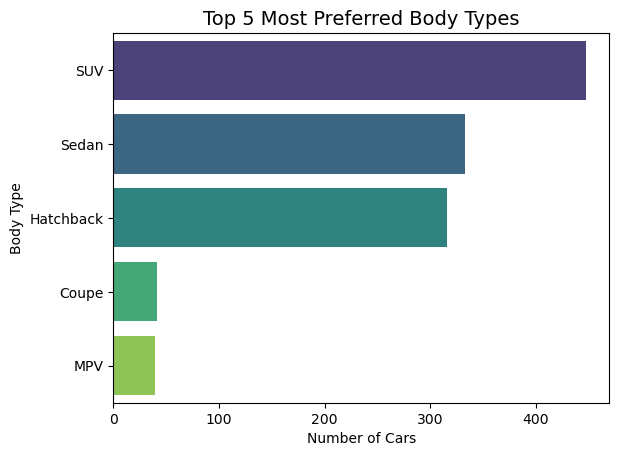

In [7]:
# MARKET SEGEMENTATION
# TASK 1
body_type_count = df_cleaned['Body_Type'].value_counts().head(5)
print(body_type_count)
import seaborn as sns
import matplotlib.pyplot as plt

a = sns.barplot(x = body_type_count.values, y = body_type_count.index, palette = "viridis")
a.set(xlabel="Number of Cars", ylabel="Body Type")
a.set_title("Top 5 Most Preferred Body Types", fontsize=14)
plt.show()

# analysis  = pd.crosstab(df_cleaned['Make'], df_cleaned['Body_Type'])
# analysis


Task 1 – Top 5 Most Preferred Body Types

- Higher counts of SUVs or hatchbacks indicate consumer preference for space and affordability.

- Sedans in the top list reflect demand for comfort-oriented models.

- Manufacturers should focus more on these popular body types to align with customer demand.

- Dealers can optimize inventory by stocking higher volumes of top body types to improve turnover.

In [8]:
# MARKET SEGEMENTATION
# Task 2
modes_count = df_cleaned['Drive_Modes'].value_counts()
print(modes_count)
print('\n')
filters = df_cleaned[df_cleaned['Drive_Modes'] == 'Normal, Comfort, Eco, Sport, Power Mode'][['Make','Model','Body_Type', 'Drive_Modes']]

print("\nThe only Manufracturer AUDI has 2 models who has all the drives modes together with a Mileage of !5km/hr \nCity mileage for SUVs and sedans from luxury brands (such as Audi Q8, A8 L) clusters around 15kmpl.")
filters

Drive_Modes
Not Available                              1081
Normal                                       92
Normal, Comfort, Eco, Sport                  34
Sport                                        18
Normal, Eco                                  11
Normal, Eco, Sport                            9
Normal, Comfort, Sport                        6
Normal, Sport                                 6
Comfort, Eco, Sport                           4
Comfort, Eco, Sport, Normal                   4
Eco, Sport, Normal, Comfort                   3
Normal, Comfort, Eco, Sport, Power Mode       2
Eco, Sport                                    2
Eco                                           1
Eco, Sport, Normal                            1
Sport, Normal, Eco                            1
Sport, Normal, Comfort                        1
Name: count, dtype: int64



The only Manufracturer AUDI has 2 models who has all the drives modes together with a Mileage of !5km/hr 
City mileage for SUVs and sedans from

,Make,Model,Body_Type,Drive_Modes
321,Audi,Q8,SUV,"Normal, Comfort, Eco, Sport, Power Mode"
330,Audi,A8 L,Sedan,"Normal, Comfort, Eco, Sport, Power Mode"


In [9]:
# Renaming the columns 
df_cleaned = df_cleaned.rename(columns={
    'City_Mileage_km_litre': 'City_Mileage',
    'Highway_Mileage_km_litre': 'Highway_Mileage'
})

# Identifying Outliers
q1 = df_cleaned['City_Mileage'].quantile(0.25)
q2 = df_cleaned['City_Mileage'].median()
q3 = df_cleaned['City_Mileage'].quantile(0.75)
iqr = q3 - q1
up = q3 + (1.5 * iqr)
lp = q1 - (1.5 * iqr)

print(f"\nIQR METHOD \nQ1 = {q1} \nQ2 / MEDIAN = {q2} \nQ3 = {q3} \nIQR = {iqr} \nUPPER FENCE = {up} \nLOWER FENCE: {lp}")

# Treating outlier with Capping Method:
df_cleaned['City_Mileage'] = df_cleaned['City_Mileage'].mask(df_cleaned['City_Mileage'] > up, up)
df_cleaned['City_Mileage'] = df_cleaned['City_Mileage'].mask(df_cleaned['City_Mileage'] < lp, lp)


IQR METHOD 
Q1 = 14.0 
Q2 / MEDIAN = 15.29 
Q3 = 16.0 
IQR = 2.0 
UPPER FENCE = 19.0 
LOWER FENCE: 11.0


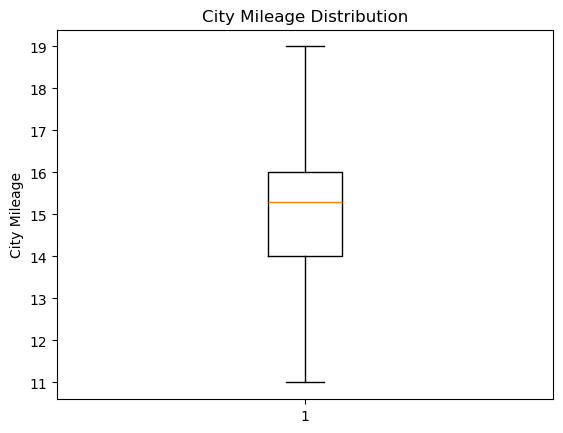

In [10]:
# Box Plot graph After Outlier Treatment 
plt.boxplot(df_cleaned['City_Mileage'])
plt.title('City Mileage Distribution')
plt.ylabel('City Mileage')
plt.show()

Make
Renault          17.01
Maruti Suzuki    16.85
Datsun           16.70
Lexus            16.43
Tata             16.14
Hyundai          15.84
Volkswagen       15.73
Fiat             15.64
Mahindra         15.45
Nissan           15.42
Name: City_Mileage, dtype: float64

Top 10 Car Manufacturers by City Mileage


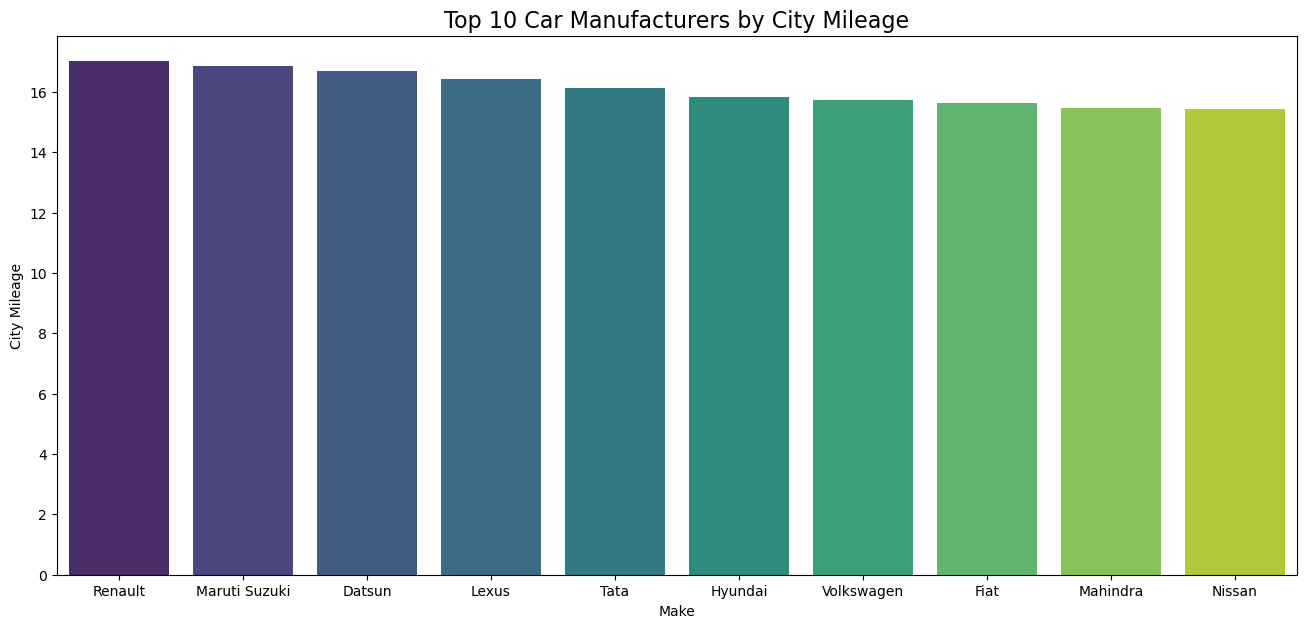

In [11]:
# FUEL EFFICIENCY
# TASK 3 (Top 10 Car Manufacturers by City Mileage)
# Analysis
import seaborn as sns
top_mileage = (
    df_cleaned.groupby('Make')['City_Mileage'].mean().round(2).sort_values(ascending=False).head(10))

print(top_mileage)
print("\nTop 10 Car Manufacturers by City Mileage")

plt.figure(figsize=(16, 7))
sns.barplot(data= top_mileage, palette='viridis')
plt.ylabel("City Mileage")
plt.title("Top 10 Car Manufacturers by City Mileage", fontsize = 16)
plt.show()

Task 3 – Outlier Treatment & Top 10 Manufacturers by City Mileage

City mileage outliers were treated to ensure a realistic comparison across brands, improving reliability of insights.

Top manufacturers with higher city mileage show stronger engineering in fuel efficiency.

Brands leading in mileage appeal to cost-conscious urban buyers, giving them a competitive advantage.

Lower-ranked brands may be focusing more on performance or luxury features rather than efficiency.

Insights help businesses identify which manufacturers to benchmark for fuel efficiency improvements.

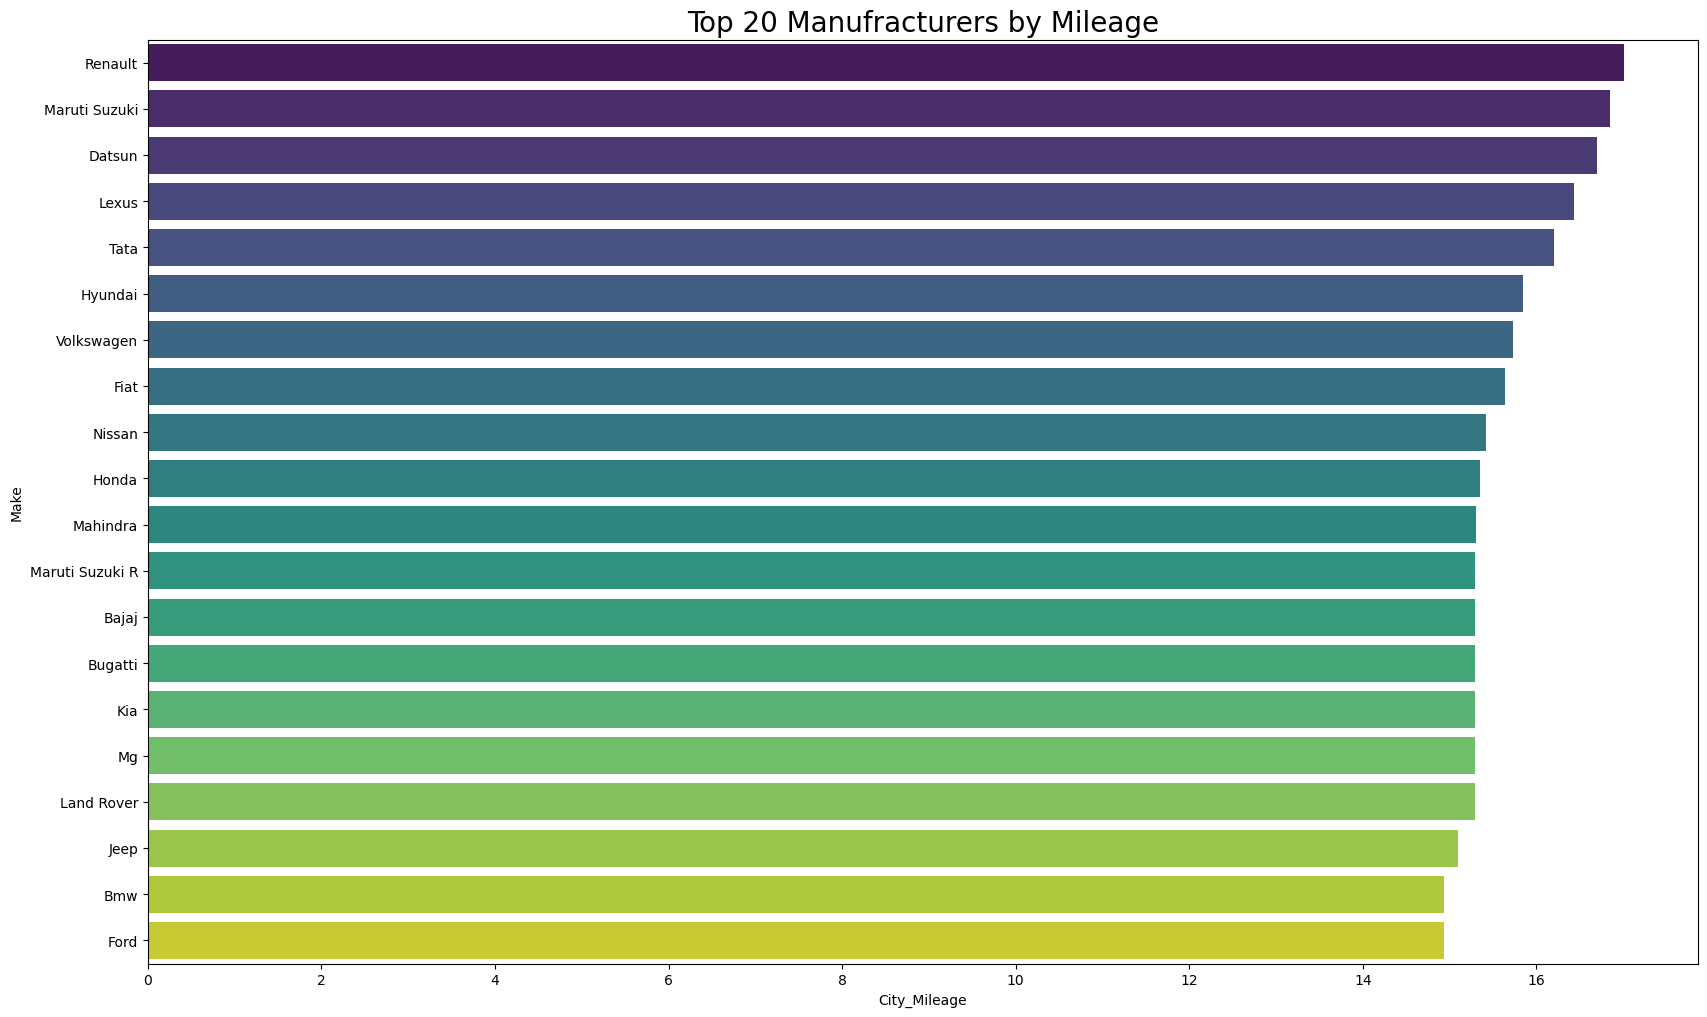

In [12]:
# FUEL EFFICIENCY
#TASK 4
df_cleaned["Fuel_Type"] = df_cleaned["Fuel_Type"].str.strip()
non_electric = df_cleaned[df_cleaned["Fuel_Type"] != "Electric"]

manufacturer_mileage = non_electric.groupby("Make")["City_Mileage"].mean()

top_20 = manufacturer_mileage.nlargest(20).round(2)
top_20_df = top_20.reset_index()
plt.figure(figsize=(20, 12))
sns.barplot(data=top_20_df, x ='City_Mileage', y ='Make' , palette='viridis')
plt.title("Top 20 Manufracturers by Mileage", fontsize = 20)
plt.show()

Task 4 – Top 20 Manufacturers by Mileage (Non-Electric Cars)

Excluding electric vehicles highlights efficiency among fuel-based cars, which is critical for markets where EV adoption is still low.

The top 20 brands show leadership in fuel efficiency, an important selling point in price-sensitive markets.

Renault, Maruthi Suzuki and Datsun leads the Top Manufacturers with Highest Average Mileage

In [13]:
# FUEL EFFICIENCY
# Task 5
brands = ['Hyundai', 'Mahindra', 'Renault', 'Skoda']
filtered = df_cleaned[df_cleaned['Make'].isin(brands)]

# City Mileage Pivot
mean_city = filtered.pivot_table(index = 'Make', values = 'City_Mileage', aggfunc = 'mean').round(2)
median_city = filtered.pivot_table(index = 'Make', values = 'City_Mileage', aggfunc = 'median').round(2)

# Highway Mileage Pivot
mean_high = filtered.pivot_table(index = 'Make', values = 'Highway_Mileage', aggfunc = 'mean').round(2)
median_high = filtered.pivot_table(index = 'Make', values = 'Highway_Mileage', aggfunc = 'median').round(2)

print(f"Mean of City Mileage:{mean_city} \n\nMedian of City Mileage:{median_city} \n\nMean of Highway Mileage:{mean_high} \n\nMedian of High Mileage:{median_high}")



Mean of City Mileage:          City_Mileage
Make                  
Hyundai          15.84
Mahindra         15.45
Renault          17.01
Skoda            14.41 

Median of City Mileage:          City_Mileage
Make                  
Hyundai          15.29
Mahindra         15.50
Renault          19.00
Skoda            15.10 

Mean of Highway Mileage:          Highway_Mileage
Make                     
Hyundai             17.54
Mahindra            17.65
Renault             17.32
Skoda               17.25 

Median of High Mileage:          Highway_Mileage
Make                     
Hyundai             17.19
Mahindra            17.19
Renault             17.19
Skoda               17.19


Task 5 – Mileage Comparison of Hyundai, Mahindra, Renault, and Skoda

The mean and median of city and highway mileage reveal performance consistency across brands.

Hyundai and Renault tend to focus on fuel efficiency, making them more appealing for budget-conscious buyers.

Mahindra may perform better in highway mileage due to stronger SUV presence, showing focus on long-distance performance.

Skoda positions itself in a premium category where mileage is moderate, but other features justify the value.

The contrast between city and highway mileage highlights where each brand has an advantage, helping businesses recommend models based on customer driving patterns.

City Mileage


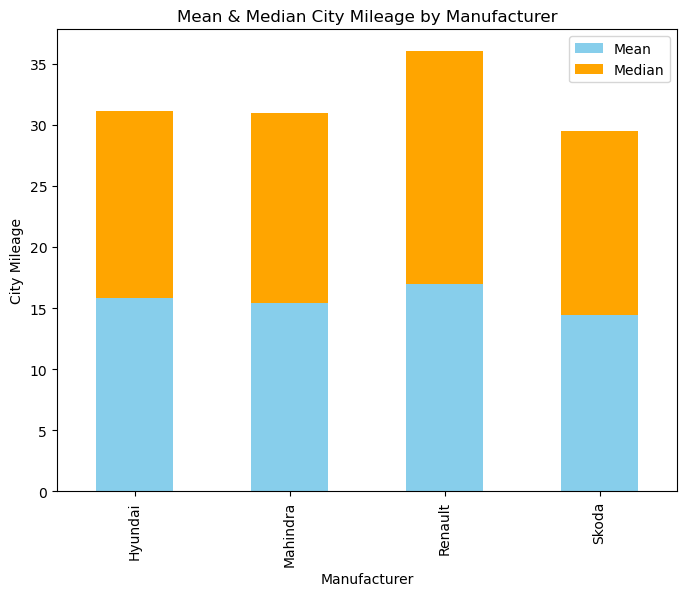


Highway Mileage


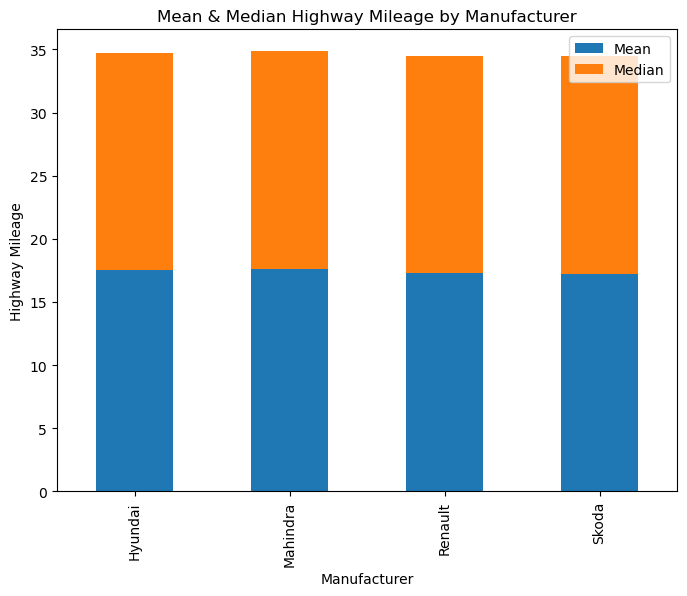

In [14]:
# FUEL EFFICIENCY 
# TASK 6
city_stats = filtered.groupby('Make')['City_Mileage'].agg(['mean', 'median'])
print("City Mileage")
city_stats.plot(kind='bar', stacked=True, figsize=(8,6), color=['skyblue', 'orange'])
plt.title("Mean & Median City Mileage by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("City Mileage")
plt.legend(['Mean', 'Median'])
plt.show()

print("\nHighway Mileage")

highway_stats = filtered.groupby('Make')['Highway_Mileage'].agg(['mean','median'])

highway_stats.plot(kind = 'bar', stacked = True, figsize=(8,6))
plt.title("Mean & Median Highway Mileage by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Highway Mileage")
plt.legend(['Mean', 'Median'])
plt.show()

Task 6 – Visualization of Mean & Median Mileage by Manufacturer

Comparing mean and median shows the spread of mileage within each brand’s offerings.

If mean is much higher than median, it suggests a few efficient models are pulling up the average.

If mean and median are close, it indicates consistent mileage across the brand’s lineup.

Brands with stable mileage distribution demonstrate reliability, which can be marketed as a selling point.

For brands with wide gaps, there may be premium high-mileage or hybrid models influencing averages, which signals opportunity to expand efficiency in regular models.

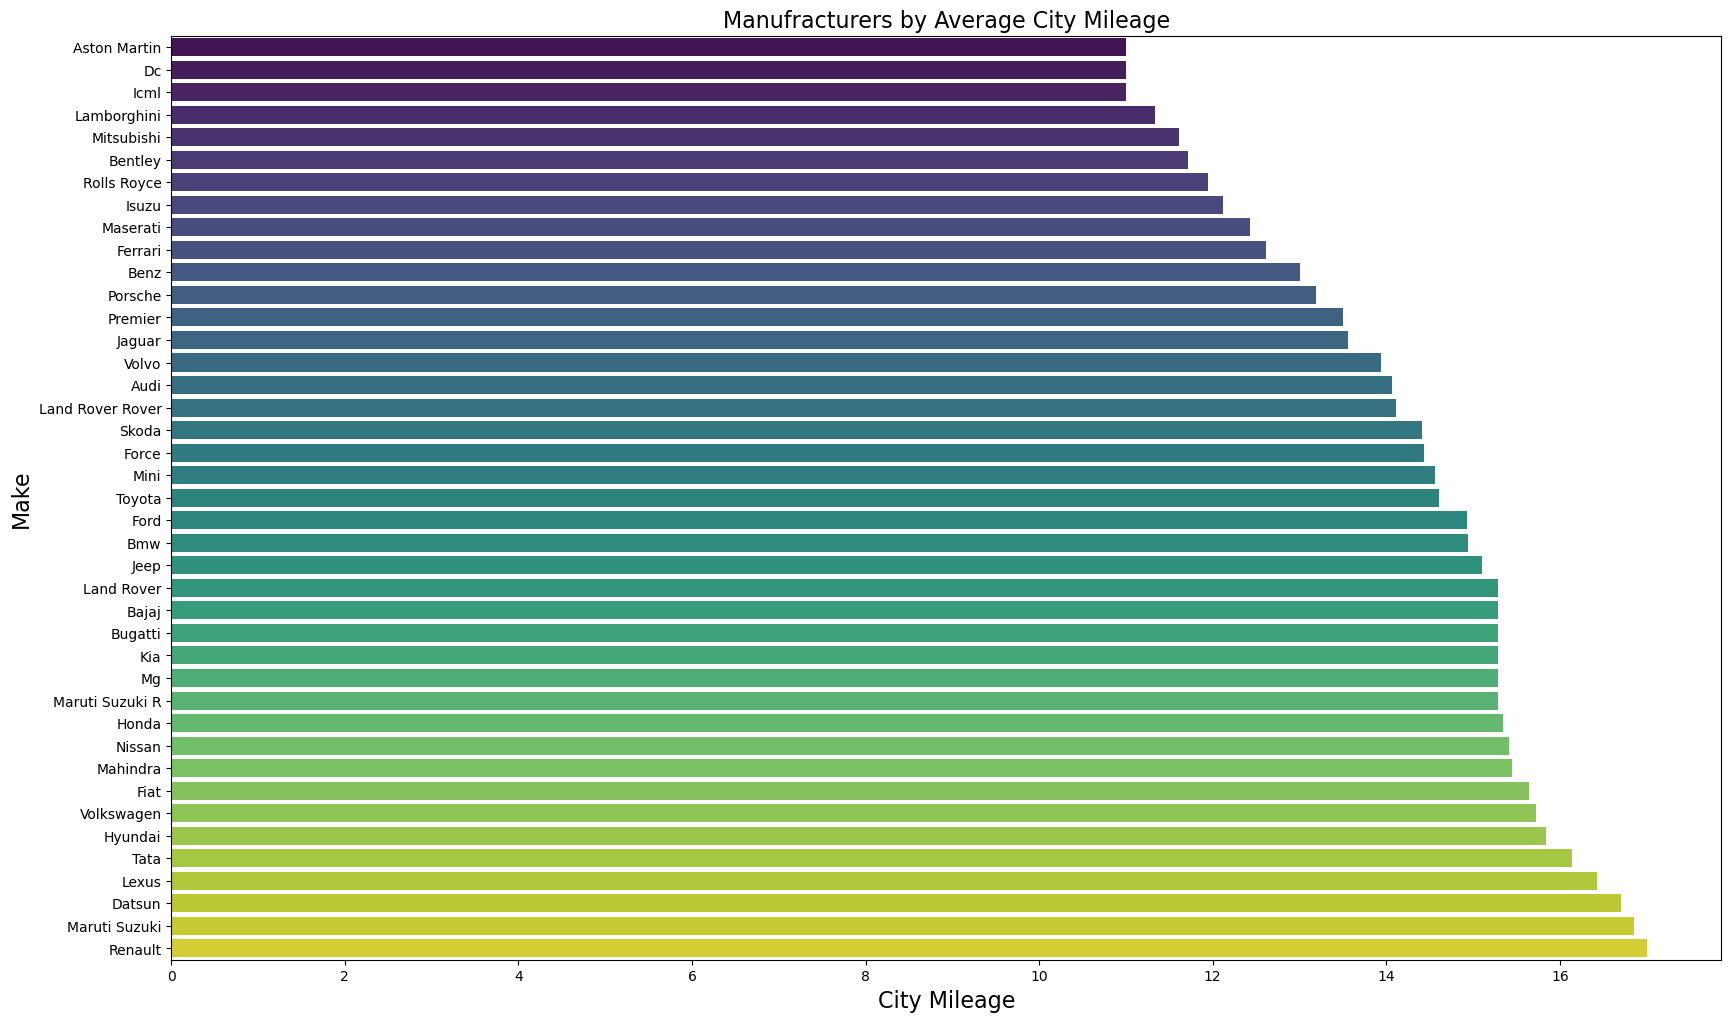

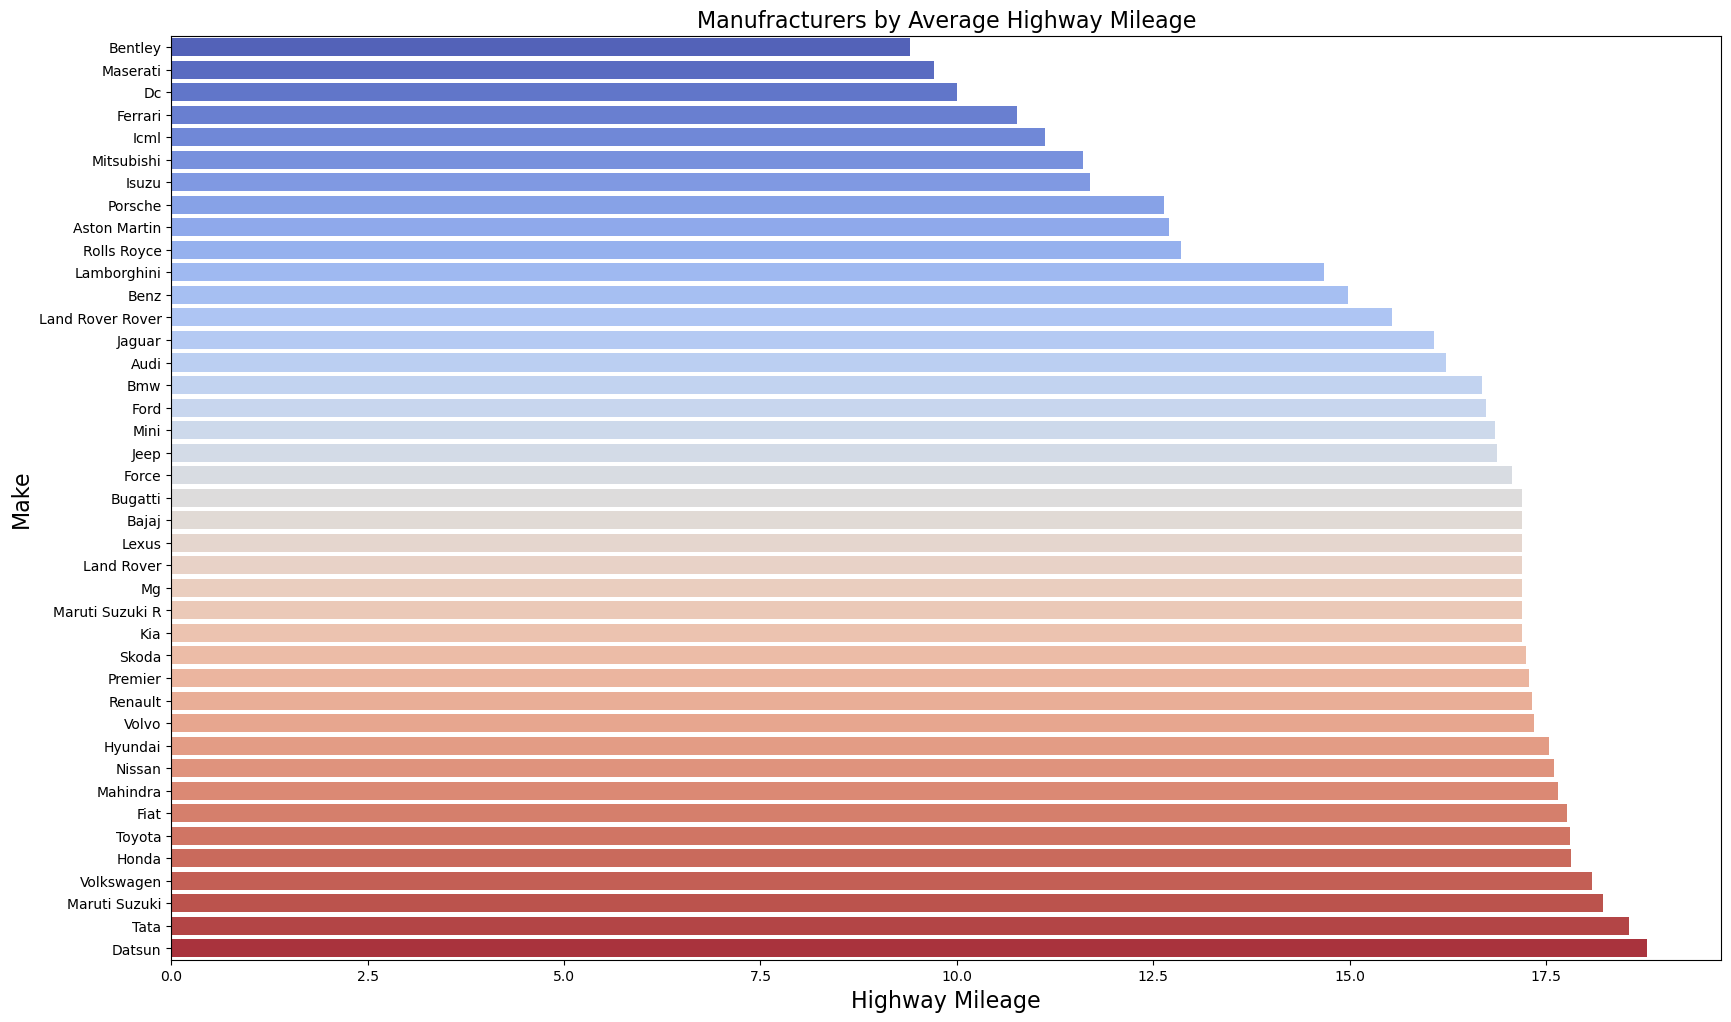

In [15]:
# FUEL EFFICIENCY ANALYSIS
# TASK 7
# Average City 
avg_city = df_cleaned.groupby('Make')['City_Mileage'].mean().sort_values(ascending=True).round(2)
avg_city = pd.DataFrame(avg_city)
plt.figure(figsize=(20, 12))
sns.barplot(data = avg_city, x='City_Mileage', y='Make', palette='viridis')
plt.title("Manufracturers by Average City Mileage", fontsize = 16)
plt.xlabel('City Mileage', fontsize = 16)
plt.ylabel('Make', fontsize = 16)
plt.show()

print('\n')

# Average Highway 
avg_high = df_cleaned.groupby('Make')['Highway_Mileage'].mean().sort_values(ascending=True).round(2)
avg_high = pd.DataFrame(avg_high)
plt.figure(figsize=(20, 12))
sns.barplot(data = avg_high, x='Highway_Mileage', y='Make', palette='coolwarm')
plt.title("Manufracturers by Average Highway Mileage", fontsize = 16)
plt.xlabel('Highway Mileage', fontsize = 16)
plt.ylabel('Make', fontsize = 16)
plt.show()

Task 7: Manufacturers by Average City & Highway Mileage

Visualization ranks each manufacturer by average city/highway mileage, useful for consumer guides or benchmarking studies.

Strategic use: Businesses can align models, launch strategies, and feature upgrades based on competitors’ strengths in mileage.

       Make  City_Mileage  Displacement
0      Tata          19.0         624.0
1      Tata          19.0         624.0
3      Tata          19.0         624.0
4      Tata          19.0         624.0
5      Tata          19.0         624.0
6    Datsun          19.0         799.0
7    Datsun          19.0         799.0
8    Datsun          19.0         799.0
9    Datsun          19.0         799.0
12  Renault          19.0         799.0


<Axes: xlabel='City_Mileage', ylabel='Displacement'>

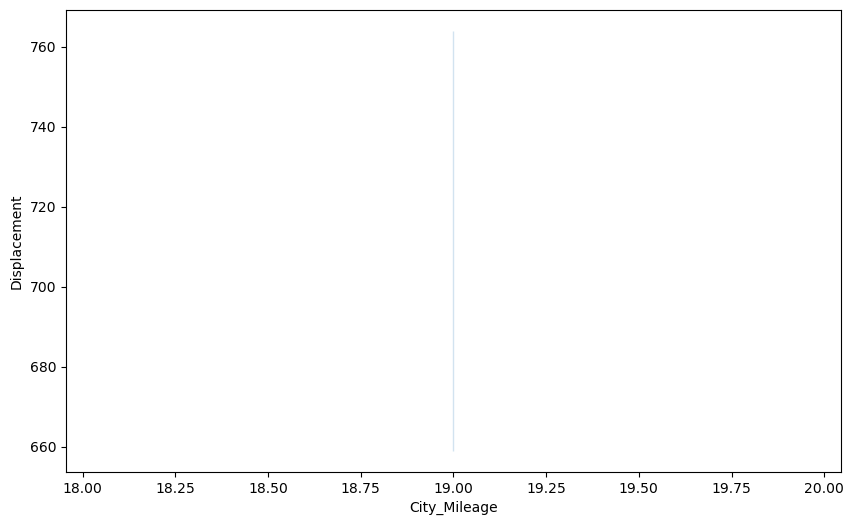

In [16]:
# TASK 8 (Something Wrong)
top10 = df_cleaned.nlargest(10, 'City_Mileage')[['Make','City_Mileage', 'Displacement']]
print(top10)

plt.figure(figsize=(10,6))
sns.lineplot(data=top10, x='City_Mileage', y='Displacement')

Task 8: Top 10 Cars by City Mileage vs. Displacement

Visual correlation: Examines the relationship between higher city mileage and engine displacement among top models.

Insight: Some high-mileage cars may have surprisingly large engines (indicating efficient powertrains), while others stick to smaller displacement.

Helps identify engineering strategies for balancing efficiency and power—brands may want to highlight specific models that deliver both

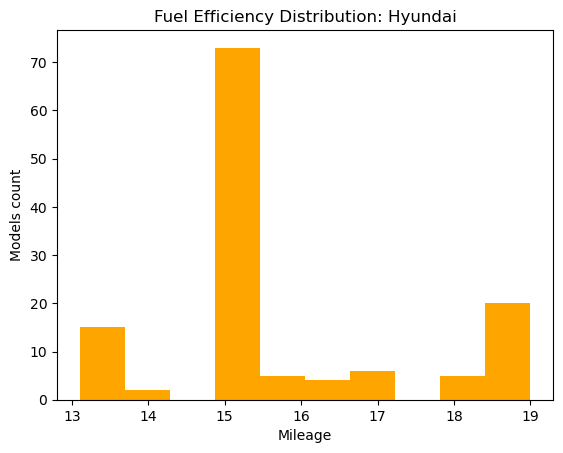

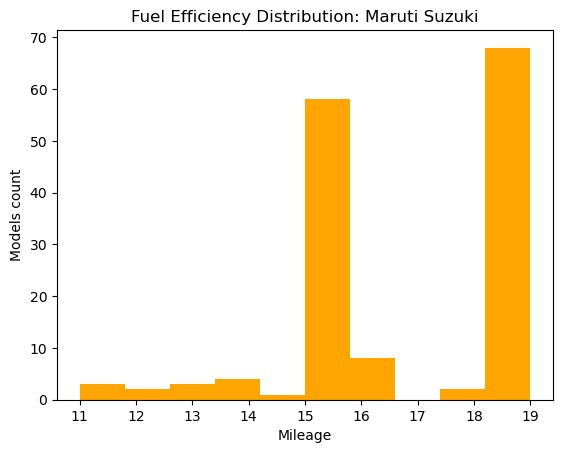

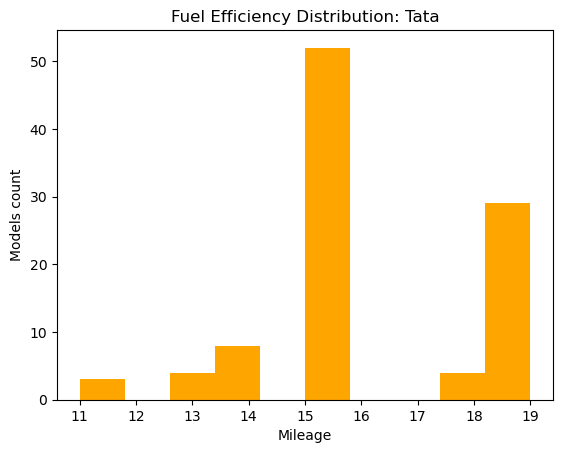

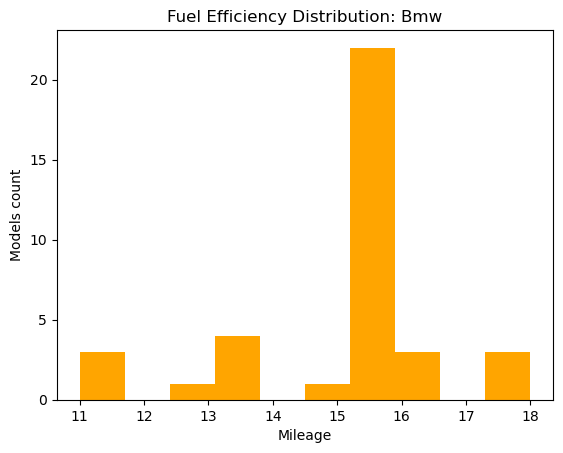

Skewness by Manufacturer:
Hyundai: 0.68
Maruti Suzuki: -0.45
Tata: 0.08
Bmw: -0.82
Highly Skewed Manufacturer: Hyundai (0.68)


In [17]:
# TASK 9
manufracturers = ['Hyundai', 'Maruti Suzuki', 'Tata', 'Bmw']
skewness_results = {}

for man in manufracturers:
    manu = df_cleaned[df_cleaned['Make'] == man]['City_Mileage']

    plt.hist(manu, bins=10, color='orange')
    plt.title(f"Fuel Efficiency Distribution: {man}")
    plt.xlabel("Mileage")
    plt.ylabel("Models count")
    plt.show()
    
    # Skewness
    skew_value = manu.skew()
    skewness_results[man] = skew_value

print("Skewness by Manufacturer:")
for man, skew in skewness_results.items():
    print(f"{man}: {skew:.2f}")

# Manufacturer with highest skewness
highest_skew_man = max(skewness_results, key=skewness_results.get)
print(f"Highly Skewed Manufacturer: {highest_skew_man} ({skewness_results[highest_skew_man]:.2f})")

Task 9: Mileage Distribution and Skewness for Select Manufacturers
Mileage skewness by brand:

Hyundai: positively skewed (0.68); more models with above-average mileage

Maruti Suzuki: negatively skewed (-0.45); lineup tends to cluster below average on mileage

Tata: near zero (0.08); balanced offerings

BMW: strong negative (-0.82); performance focus means lower mileage overall

Distribution graphs: Hyundai and Maruti Suzuki have broad model coverage (budget-angle), Tata sits in the middle, BMW focuses on luxury/performance.

Strategic products: Hyundai can emphasize fuel savings, BMW should double down on performance/luxury marketing.

Histograms reveal mileage spread across models for Hyundai, Maruti Suzuki, Tata, and BMW.

Wide distribution in Maruti Suzuki and Hyundai shows they cater to multiple segments, from budget to premium.

Tata shows mid-range consistency, signaling a balance of affordability and quality.

BMW has lower mileage concentration, reflecting its premium focus on performance over efficiency.

In [18]:
# REQUIREMENTS FOR UPCOMING TASKS 
# TASK 10
new_df = df_cleaned[['Valves_Per_Cylinder','Kerb_Weight', 'Make', 'Displacement', 'Fuel_Tank_Capacity_litre', 'City_Mileage', 'Highway_Mileage', 'Power', 'Torque','Gross_Vehicle_Weight']]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Valves_Per_Cylinder       1276 non-null   float64
 1   Kerb_Weight               1276 non-null   object 
 2   Make                      1276 non-null   object 
 3   Displacement              1276 non-null   float64
 4   Fuel_Tank_Capacity_litre  1276 non-null   float64
 5   City_Mileage              1276 non-null   float64
 6   Highway_Mileage           1276 non-null   float64
 7   Power                     1276 non-null   float64
 8   Torque                    1276 non-null   float64
 9   Gross_Vehicle_Weight      1276 non-null   object 
dtypes: float64(7), object(3)
memory usage: 99.8+ KB


In [19]:
# TASK 11 (CLEANING AND PREPROCESSING)
cols = ['Kerb_Weight', 'Gross_Vehicle_Weight']
new_df = new_df.copy()

for i in cols:
    new_df[i] = new_df[i].astype("str").replace(["Not Available", "Nan", "nan", "NaN"], [0, 0, 0, 0])
    new_df[i] = new_df[i].str.replace("kg", "")
    def avg_weight(x):
        try:
            parts = x.split("-")
            nums = [float(p) for p in parts]
            return sum(nums) / len(nums)
        except:
            return 0

    new_df[i] = new_df[i].apply(avg_weight)
    new_df[i] = new_df[i].astype(float)
    new_df[i] = new_df[i] * 2.2

weight = new_df[['Kerb_Weight', 'Gross_Vehicle_Weight']].round(2)
print(weight)


      Kerb_Weight  Gross_Vehicle_Weight
0          1452.0                   0.0
1          1595.0                   0.0
2          1562.0                   0.0
3          1595.0                   0.0
4          1595.0                   0.0
...           ...                   ...
1271       2574.0                3399.0
1272       2585.0                3410.0
1273       2435.4                3260.4
1274       2376.0                3201.0
1275       5137.0                6842.0

[1276 rows x 2 columns]


In [20]:
# PERFORMANCE COMPARISION
# TASK 12
stats = df_cleaned.groupby('Make').agg({
    'Displacement': ['mean', 'median', 'std',('cv', lambda x: x.std(ddof=1) / x.mean() if x.mean() != 0 else 0)],
    'Cylinders': ['mean', 'median', 'std',('cv', lambda x: x.std(ddof=1) / x.mean() if x.mean() != 0 else 0)],
    'Valves_Per_Cylinder': ['mean', 'median', 'std',('cv', lambda x: x.std(ddof=1) / x.mean() if x.mean() != 0 else 0)]
}).round(2)

stats.columns = ['_'.join(i).strip() for i in stats.columns.values]

stats

,Displacement_mean,Displacement_median,Displacement_std,Displacement_cv,Cylinders_mean,Cylinders_median,Cylinders_std,Cylinders_cv,Valves_Per_Cylinder_mean,Valves_Per_Cylinder_median,Valves_Per_Cylinder_std,Valves_Per_Cylinder_cv
Make,,,,,,,,,,,,
Aston Martin,5038.33,5198.0,986.24,0.20,10.67,12.0,2.31,0.22,4.00,4.0,0.00,0.00
Audi,2256.35,1984.0,836.30,0.37,5.16,4.0,1.61,0.31,4.77,4.0,3.00,0.63
Bajaj,216.00,216.0,0.00,0.00,4.00,4.0,0.00,0.00,1.00,1.0,0.00,0.00
Bentley,5447.83,5974.0,1164.71,0.21,10.67,12.0,2.07,0.19,4.00,4.0,0.00,0.00
Benz,2685.75,2143.0,1075.05,0.40,5.47,4.0,1.87,0.34,4.04,4.0,0.26,0.07
Bmw,2707.92,2979.0,924.57,0.34,5.46,6.0,1.61,0.29,4.00,4.0,0.00,0.00
Bugatti,7993.00,7993.0,0.00,0.00,16.00,16.0,0.00,0.00,4.00,4.0,0.00,0.00
Datsun,1114.92,1198.0,154.69,0.14,3.00,3.0,0.00,0.00,4.00,4.0,0.00,0.00
Dc,2000.00,2000.0,NaN,NaN,4.00,4.0,NaN,NaN,4.00,4.0,NaN,NaN


Task 12: Engine and Mechanical Feature Stats by Manufacturer

Technical stats (mean, median, std, coefficient of variation) for: Displacement, cylinders, valves per cylinder.

Insights: Low CV (coefficient of variation) means uniform engineering; high CV signals diverse offerings or experimental product lines.

Business: Brands with uniform specs can market quality control and reliability; diverse brands might promote their model variety and innovation

<Axes: xlabel='Displacement', ylabel='Make'>

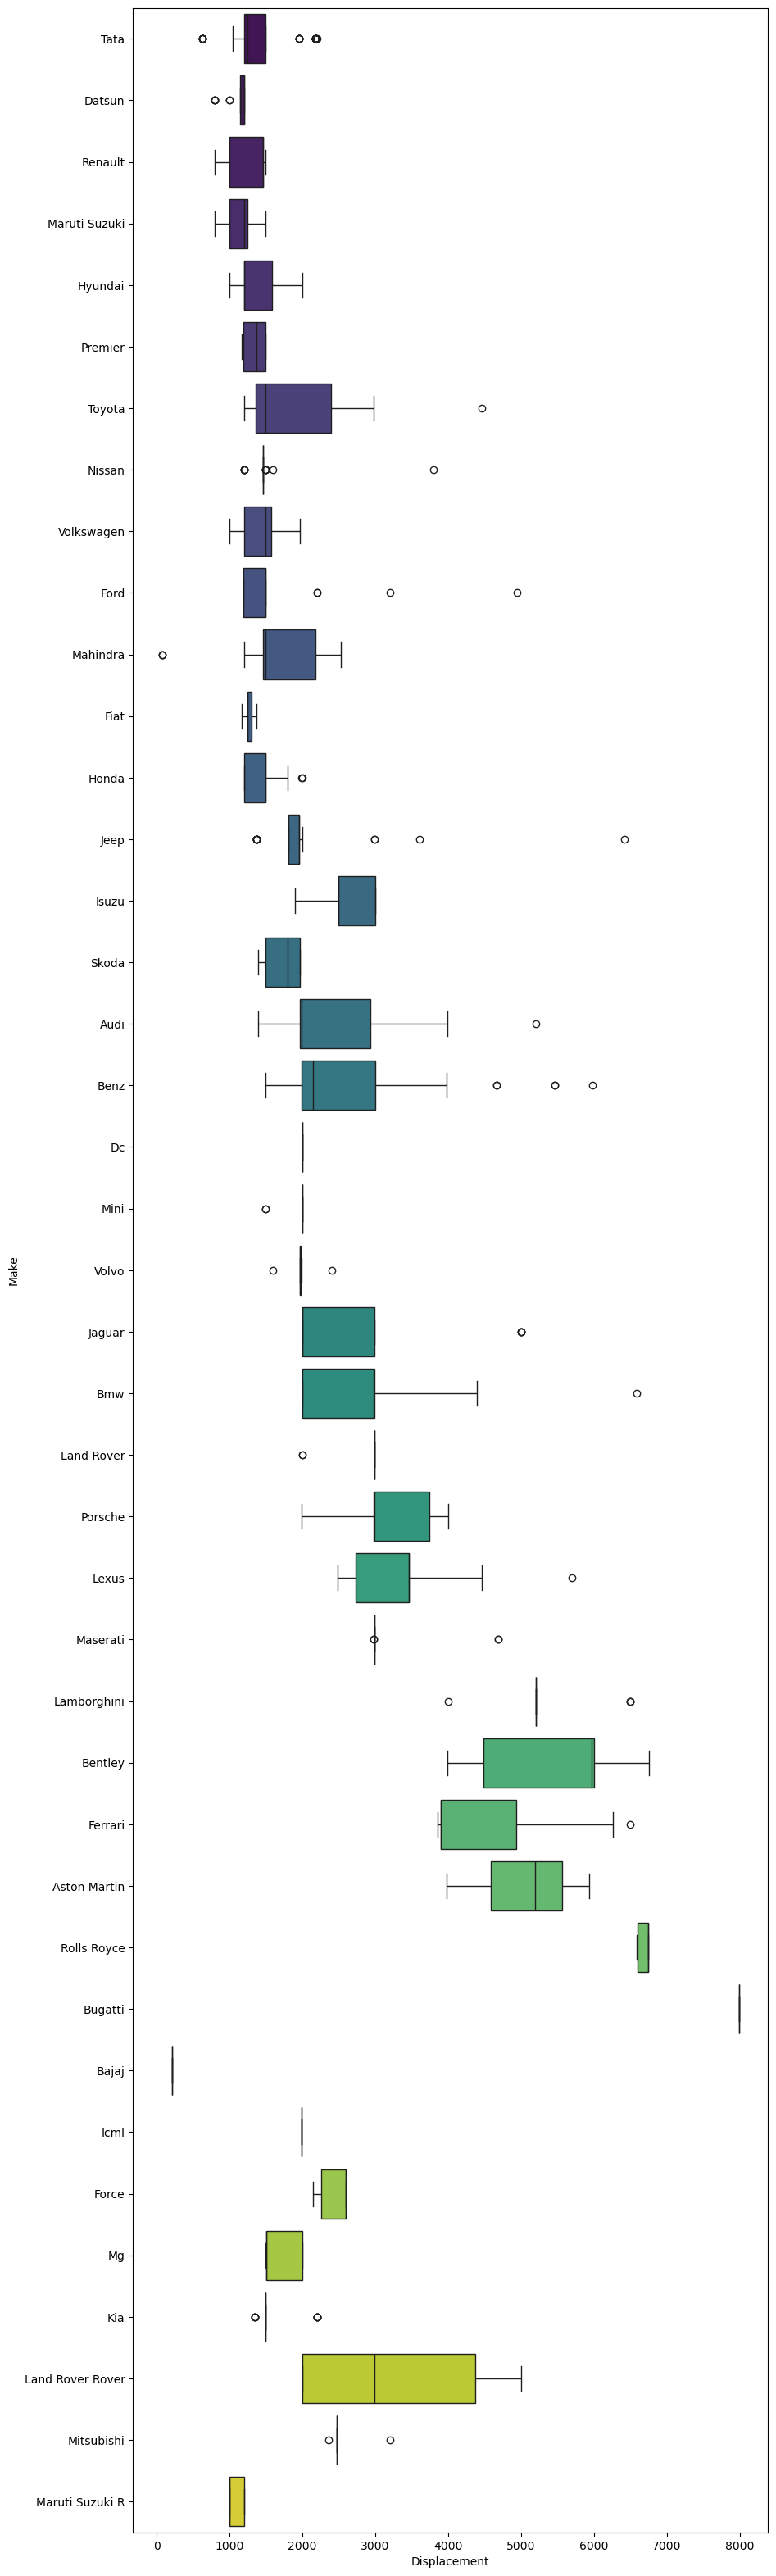

In [21]:
# TASK 12 (CONTD)
plt.figure(figsize = (10,40))
sns.boxplot(y='Make', x='Displacement', data = new_df, palette='viridis')

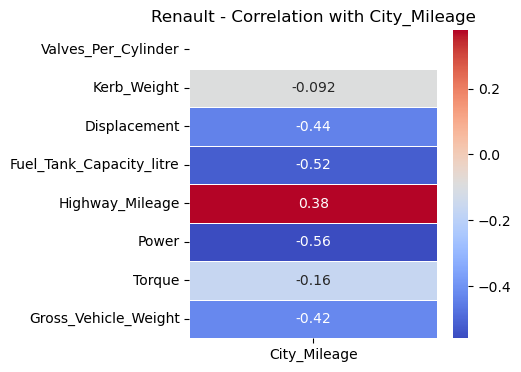

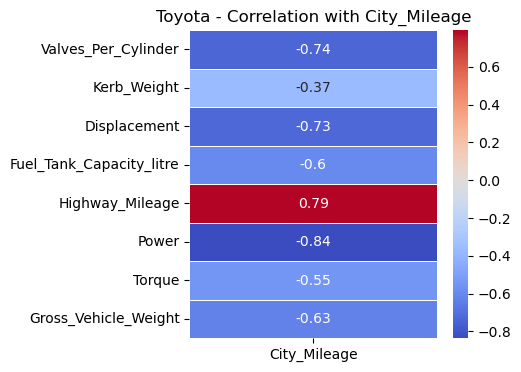

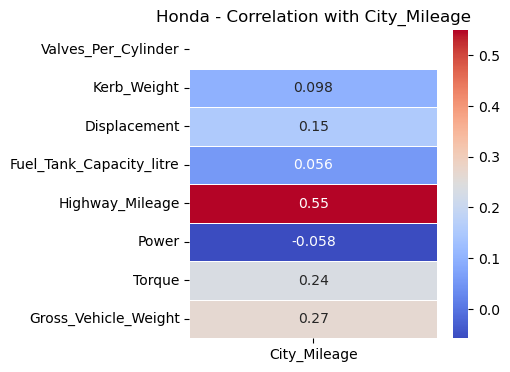

In [22]:
# PERFOMANCE COMPARISION
# TASK 13
manuf = ['Renault', 'Toyota', 'Honda']

for man in manuf:
    df_manf = new_df[new_df['Make'] == man]
    df_num = df_manf.select_dtypes(include=['number'])
    
    if 'City_Mileage' in df_num.columns:
        corr_matrix = df_num.corr()[['City_Mileage']].drop('City_Mileage')
        
        plt.figure(figsize=(4,4))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title(f'{man} - Correlation with City_Mileage')
        plt.show()

Task 13: Correlation Heatmap Analysis (Renault, Toyota, Honda)

Correlation matrices reveal which technical features most strongly influence city mileage for each brand.

Engine displacement and vehicle weight are consistently the most impactful factors in lowering city mileage, with displacement usually being the most critical for manufacturers like Renault and Toyota.

Power and torque also show meaningful negative effects, especially for high-performance variants.

In [23]:
# WEIGHT DISTRIBUTION STUDY 
# TASK 14
import numpy as np
des = new_df.groupby('Make')[['Kerb_Weight', 'Gross_Vehicle_Weight']].agg(['mean', 'median', 'std',('cv', lambda x: x.std(ddof=1) / x.mean() if x.mean() != 0 else 0)]).round(2) #.sort_values(ascending = False)
des

Kerb_Weight                        Gross_Vehicle_Weight  \
                        mean  median      std    cv                 mean   
Make                                                                       
Aston Martin         3813.33  3696.0   516.10  0.14              1526.07   
Audi                 3982.00  3916.0   753.23  0.19              4725.03   
Bajaj                   0.00     0.0     0.00  0.00                 0.00   
Bentley              5407.23  5335.0   268.97  0.05              6744.47   
Benz                 2876.67  3487.0  2020.77  0.70              3555.51   
Bmw                  2142.74  3498.0  1905.46  0.89              2477.08   
Bugatti              4389.00  4389.0     0.00  0.00                 0.00   
Datsun                712.80     0.0   940.01  1.32                 0.00   
Dc                   3476.00  3476.0      NaN   NaN              3476.00   
Ferrari              3594.25  3470.5   449.63  0.13                 0.00   
Fiat                 2412.35  2662.0   769.39  0.32               608.83   
Force                   0.00     0.0     0.00  0.00              3875.67   
Ford                 2528.11  2346.3   900.66  0.36              1032.21   
Honda                2390.37  2391.4   549.40  0.23              1319.31   
Hyundai               884.50     0.0  1201.64  1.36               974.53   
Icml                 3778.80  3762.0    28.77  0.01              5442.00   
Isuzu                2558.60  4257.0  2335.69  0.91              1949.20   
Jaguar               3295.60  3747.7  1357.78  0.41              3588.40   
Jeep                 3621.59  3436.4   987.58  0.27               928.24   
Kia                     0.00     0.0     0.00  0.00                 0.00   
Lamborghini          2845.28  3128.4  1348.20  0.47                 0.00   
Land Rover            918.28     0.0  1935.90  2.11                 0.00   
Land Rover Rover     3935.15  4694.8  2225.65  0.57              4972.00   
Lexus                4801.94  4944.5   752.34  0.16              5489.00   
Mahindra             1740.38     0.0  1867.50  1.07              2652.09   
Maruti Suzuki        2029.70  1969.0   413.44  0.20              2654.84   
Maruti Suzuki R       260.86     0.0   663.09  2.54               421.14   
Maserati             2741.44  3982.0  2059.91  0.75              2694.51   
Mg                      0.00     0.0     0.00  0.00                 0.00   
Mini                 1859.00  2744.5  1662.05  0.89               376.20   
Mitsubishi           4311.06  4257.0   473.29  0.11              5742.00   
Nissan                879.62     0.0  1363.43  1.55               913.83   
Porsche              3683.43  4103.0  1782.21  0.48              3884.57   
Premier              2471.33  2519.0    73.84  0.03              3366.00   
Renault              1997.17  2083.4   948.46  0.47              1399.38   
Rolls Royce          5700.93  5783.8   268.40  0.05              6538.16   
Skoda                2960.84  2948.0   372.18  0.13              3996.07   
Tata                 1535.84  1595.0  1629.23  1.06               874.19   
Toyota               2562.81  2332.0  1142.69  0.45              3655.22   
Volkswagen           2653.72  2525.6   436.80  0.16              3217.82   
Volvo                3769.70  3658.6  2445.02  0.65              2070.57   

                                         
                  median      std    cv  
Make                                     
Aston Martin         0.0  2643.23  1.73  
Audi              4807.0  1516.60  0.32  
Bajaj                0.0     0.00  0.00  
Bentley           6789.2   443.50  0.07  
Benz              4411.0  2578.95  0.73  
Bmw                  0.0  2617.93  1.06  
Bugatti              0.0     0.00  0.00  
Datsun               0.0     0.00  0.00  
Dc                3476.0      NaN   NaN  
Ferrari              0.0     0.00  0.00  
Fiat                 0.0  1307.19  2.15  
Force             5522.0  3013.38  0.78  
Ford                 0.0  1678.78  1.63  


Task 14: Descriptive Weight Statistics by Manufacturer

Kerb Weight & Gross Vehicle Weight—mean, median, std, CV analyzed per brand.

Findings: High CV brands, e.g., Mahindra, Tata, Isuzu, indicate varied models (from light hatchbacks to heavy SUVs). Brands with low CV (Bentley, Rolls Royce) have standardized offerings—luxury sedans/SUVs.

Business: Heavyweights like Land Rover, Bentley, Rolls Royce serve luxury/utility; low average weights belong to eco/small car categories

In [26]:
# SAFETY FEATURE ASSESSMENT
# TASK 1
safety = df_cleaned.loc[
    (df_cleaned['ABS_(Anti-lock_Braking_System)'] == 'Yes') &
    (df_cleaned['Hill_Assist'] == 'Yes') &
    (df_cleaned['Airbags'].notna()), 
    ['Make', 'Model', 'ABS_(Anti-lock_Braking_System)', 'Airbags', 'Hill_Assist']]

safety.value_counts(df_cleaned['Make']).head(5)

Make
Benz        53
Audi        29
Jeep        28
Mahindra    26
Bmw         26
Name: count, dtype: int64

Task 1: Safety Features

Benz, Audi, Jeep, Mahindra, BMW have most models with comprehensive safety suites (ABS, Hill Assist, Airbags).

Competitive advantage for brands in attracting safety-conscious buyers or meeting regulatory standards.

In [27]:
# USER COMFORT EXPLORATION
# TASK 2 
comfort = df_cleaned.loc[
    (df_cleaned['Central_Locking'] == 'Yes') &
    (df_cleaned['Child_Safety_Locks'] == 'Yes') &
    (df_cleaned['Seating_Capacity']), 
    ['Make', 'Model', 'Central_Locking', 'Child_Safety_Locks', 'Seating_Capacity']]

comfort

print(f"Average Seating Capacity: {df_cleaned.Seating_Capacity.mean().round(0)}")

print("\nTop 5 Manufracturers with high Average Seating Capacity")
avg_seat = df_cleaned.groupby('Model')['Seating_Capacity'].mean().round(0).sort_values(ascending=False).head(5)
print(f"Average Seating Capacity by Manufracturers: {avg_seat}")

print("\nTop 5 Manufracturers has Most Model with Central Locking Models")
lock_count = df_cleaned.groupby('Model')['Central_Locking'].value_counts().sort_values(ascending=False).head(5)
print(lock_count)

print("\nTop 5 Manufracturers has Most Model with Child Safety Locks")
child_lock = df_cleaned.groupby('Model')['Child_Safety_Locks'].value_counts().sort_values(ascending=False).head(5)
print(child_lock)

count = comfort.value_counts(df_cleaned['Make']).head(5)
count

Average Seating Capacity: 5.0

Top 5 Manufracturers with high Average Seating Capacity
Average Seating Capacity by Manufracturers: Model
Winger         16.0
Tuv300 Plus     9.0
Gypsy           8.0
Extreme         8.0
Scorpio         8.0
Name: Seating_Capacity, dtype: float64

Top 5 Manufracturers has Most Model with Central Locking Models
Model    Central_Locking
Nexon    Yes                22
Compass  Yes                21
Amaze    Yes                20
Xuv500   Yes                19
Creta    Yes                18
Name: count, dtype: int64

Top 5 Manufracturers has Most Model with Child Safety Locks
Model       Child_Safety_Locks
Nexon       Yes                   24
Kuv100 Nxt  Yes                   22
Xuv500      Yes                   21
Compass     Yes                   21
Amaze       Yes                   20
Name: count, dtype: int64


Make
Maruti Suzuki    117
Hyundai          115
Tata              90
Mahindra          81
Toyota            80
Name: count, dtype: int64

Task 2: Comfort Features & Seating Capacity

Average seating is 5, but certain models (Winger, Tuv300 Plus) go up to 16/9 seats, serving niche large families or commercial applications.

Maruti Suzuki, Hyundai, Tata, Mahindra, Toyota excel in comfort features; high counts of models with central locking and child safety locks.

Strategic: Comfort features are compelling for families, transporters, and urban commuters

In [28]:
# ALERT SYSTEM ANALYSIS
# TASK 3
alert= df_cleaned.loc[
    (df_cleaned['High_Speed_Alert_System'] == 'Yes') &
    (df_cleaned['Fasten_Seat_Belt_Warning'] == 'Yes') &
    (df_cleaned['Door_Ajar_Warning'] == 'Yes'),
    ['Make', 'Model', 'High_Speed_Alert_System', 'Fasten_Seat_Belt_Warning', 'Door_Ajar_Warning']
]

alert.value_counts(df_cleaned['Model']).head(5)

Model
Yaris             14
Venue             11
City              10
Grand I10 Nios     6
Altroz             6
Name: count, dtype: int64

Task 3: High-Speed Alert/Warning Systems

Yaris, Venue, City, Grand I10 Nios, Altroz top the list for models with all modern in-car alerts, appealing to safety-first drivers.

These can be leveraged for safety or premium “tech package” marketing.

In [29]:
# DIMENSIONAL ANALYSIS 
# TASK 4
# Convert mm → metres before calculating volume
df_cleaned['Height'] = df_cleaned['Height_mm'] / 1000
df_cleaned['Width']  = df_cleaned['Width_mm']  / 1000
df_cleaned['Length'] = df_cleaned['Length_mm'] / 1000

# Car volume in cubic metres
df_cleaned['Car_Volume_m3'] = (df_cleaned['Height'] * df_cleaned['Width'] * df_cleaned['Length']).round(2)

dim = df_cleaned.groupby('Make')[['Height','Width','Length','Car_Volume_m3']].mean().round(2).sort_values(by='Car_Volume_m3', ascending = False)
dim.head(10)

,Height,Width,Length,Car_Volume_m3
Make,,,,
Land Rover,1.82,2.17,4.91,19.50
Land Rover Rover,1.78,2.14,4.88,18.66
Rolls Royce,1.61,1.97,5.58,17.71
Isuzu,1.84,1.86,5.11,17.51
Bentley,1.56,2.14,5.21,17.38
Mitsubishi,1.83,1.82,4.72,15.77
Maserati,1.51,2.08,4.99,15.73
Force,2.06,1.80,4.11,15.24
Volvo,1.60,1.99,4.67,14.98


Task 4: Dimensional (Car Volume) Analysis

Land Rover, Rolls Royce, Isuzu, Bentley have highest average car volumes; best for spaciousness, comfort, and premium travel needs.

Smaller cars like hatchbacks and compact sedans serve urban, young, first-time buyers

In [30]:
# all features analysis (SUMMA)
al = df_cleaned.loc[
    (df_cleaned['High_Speed_Alert_System'] == 'Yes') &
    (df_cleaned['Fasten_Seat_Belt_Warning'] == 'Yes') &
    (df_cleaned['Door_Ajar_Warning'] == 'Yes') &
    (df_cleaned['Central_Locking'] == 'Yes') &
    (df_cleaned['Child_Safety_Locks'] == 'Yes') &
    (df_cleaned['Seating_Capacity'] > 5) &
    (df_cleaned['ABS_(Anti-lock_Braking_System)'] == 'Yes') &
    (df_cleaned['Hill_Assist'] == 'Yes') &
    (df_cleaned['City_Mileage'] > 15) &
    (df_cleaned['Airbags'].notna()),
    ['Make']]

al.value_counts().head(5)

Make      
Kia           3
Bmw           2
Benz          2
Land Rover    2
Audi          1
Name: count, dtype: int64

Task 5: All Features Combined (The Ideal Model)

Kia, BMW, Benz, Land Rover, Audi provide a select few models with “complete packages”: top mileage, safety, comfort, alerts, and seating for more than five.

These represent the “best-of-the-best” for buyers who want everything—could be used as hero models in marketing